# Task04分享 - 文字图例尽眉目

学习内容：https://github.com/datawhalechina/fantastic-matplotlib

本节主要分为文字部分和图例部分。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 文字部分

我们最熟悉的文字应用就是标题和标签了。

+ 为子图设置标题

    `Axes.set_title(self, label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)`

+ 为主图设置标题

    `Figure.suptitle(self, t, **kwargs)`

+ 为子图设定x轴标签

    `Axes.set_xlabel(self, xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)`

+ 为子图设定y轴标签

    `Axes.set_ylabel(self, ylabel, fontdict=None, labelpad=None,*, loc=None, **kwargs)`


（注：还有一些通过绝对定位的文本API，例如`Axes.text()`和`Axes.annotate()`等。这些用法偏底层，导出用PhotoShop实现会更方便，这里就将它们忽略啦）

通过观察上述的方法签名，我们可以总结出适用于大多数文本设定的参数。

除去self，第一个参数通常是文本的内容，`str`类型。

### fontdict参数

`dict`类型，控制字体样式。通常来说，看见这种参数就和`**kwargs`一样，一定要查阅官方文档。

下面简单演示一下。

Text(0.5, 1.0, 'abc123')

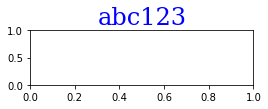

In [2]:
fig, axes = plt.subplots(figsize=(4, 1))
axes.set_title('abc123', fontdict={'family': 'serif', 'size': 24, 'color':  'blue'})

当你查阅[官方文档](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)以后，就会发现fontdict的参数其实也可以放在`kwargs`里面。

我们看下另一种写法。

Text(0.5, 1.0, 'abc123')

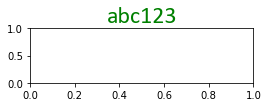

In [3]:
fig, axes = plt.subplots(figsize=(4, 1))
axes.set_title('abc123', family='Calibri', size=24, color='green')

没有什么特别的嘛，大家可以根据自己喜好来。比如我喜欢都放在`kwargs`里。

有的同学可能认为这样不方便复用，比如希望切换多套样式啥的。`kwargs`参数是支持字典解构的，像下面这样写就可以了。

In [4]:
d = {'family': 'serif', 'size': 24, 'color':  'blue'}
axes.set_title('abc123', **d)

Text(0.5, 1.0, 'abc123')

`FontProperties`对象也可以用于设置属性，但只能设置部分属性，例如字体颜色就不行。

个人感觉，样式管理部分matplotlib的接口比较乱，设置方法不统一。官方原本可能是想把字体本身样式的设置和附加样式的设置区分开，但用户通常意识不到这种界限，导致不知道哪个设置该用哪个接口。

建议还是`kwargs`，自己维护字典吧！

### loc参数

`str`类型，用于设定对齐方式，默认为`center`。还可以是`left`或者`right`。

Text(0.0, 1.0, 'abc123')

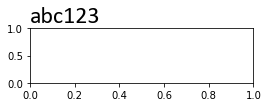

In [5]:
fig, axes = plt.subplots(figsize=(4, 1))
axes.set_title('abc123', loc='left', family='Calibri', size=24)

### pad参数

`float`类型，设定一个相对距离。在不同的情景下意义略有区别，在标签那里叫`labelpad`。

如下所示，在子图标题中，`pad`是控制字体到图上边框的距离。

默认的pad数量基本够用，有特殊需求时可以手动调到合适值。

Text(0.5, 1.0, 'abc123')

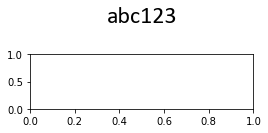

In [6]:
fig, axes = plt.subplots(figsize=(4, 1))
axes.set_title('abc123', pad=32, family='Calibri', size=24)

## Tick上的文本

以x为例，主要涉及`Axes.set_xticks()`和`Axes.set_xticklabels()`两个方法。

前者是一个实数构成的数组，指示哪些位置应放置标度，后者给出每个标度对应的标签。二者长度是要相等的。

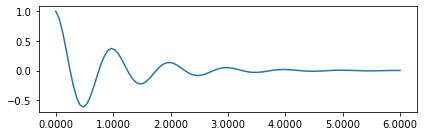

In [7]:
x = np.linspace(0.0, 6.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)
fig, axes = plt.subplots(1, 1, figsize=(6, 2), tight_layout=True)
axes.set_xticks(list(range(7)))
axes.set_xticklabels('{:.4f}'.format(i) for i in range(7))
axes.plot(x, y)

还有其他方法来设置Tick文本，例如Tick Locators和Formatters。它们只是对直接设置的一种封装。

具体情景中还是建议用上述直接设置的方法，加以处理即可达到想要的效果。

## 图例部分

首先图例（legend）是什么？

图例用来说明图中的各个对象有什么含义。比如我现在画两条曲线，$y=x$和$y=x^2$，如下图。


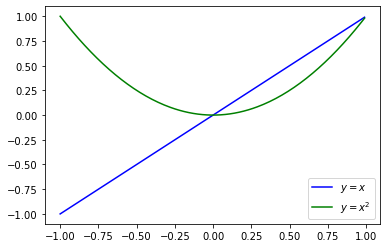

In [8]:
x = np.arange(-1, 1, 0.01)
plt.plot(x, x, label='$y=x$', c='blue')
plt.plot(x, x**2, label='$y=x^2$', c='green')
plt.legend()
plt.show()

右下角这个小框就是图例，它清晰的表明蓝色曲线是$y=x$，而绿色曲线是$y=x^2$。

通常来说，显示图例调用`.legend()`就可以了，不需要带参数。matplotlib会自动显示需要显示的。

我们对图例的自定义操作主要是改变它的样式。比如修改边框颜色，加大字号等。

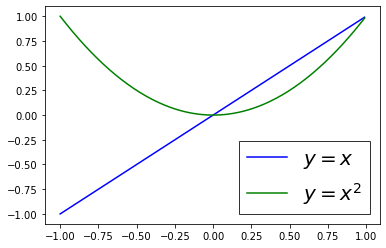

In [9]:
plt.plot(x, x, label='$y=x$', c='blue')
plt.plot(x, x**2, label='$y=x^2$', c='green')
lgd = plt.legend(
    prop={'size': 20},      # 设置字号
    facecolor='white',      # 纯白背景
    edgecolor='black',      # 纯黑边框
    shadow=False,           # 关闭阴影
    fancybox=False          # 不要圆角矩形
    )

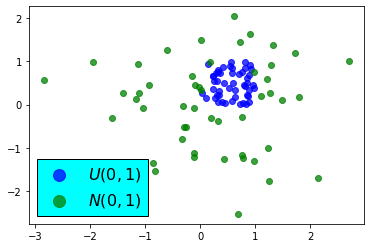

In [10]:
plt.scatter(np.random.uniform(0, 1, 50), np.random.uniform(0, 1, 50),
    label='$U(0, 1)$', c='blue', alpha=0.75)
plt.scatter(np.random.normal(0, 1, 50), np.random.normal(0, 1, 50),
    label='$N(0, 1)$', c='green', alpha=0.75)
lgd = plt.legend(
    prop={'size': 16},      # 设置字号
    facecolor='cyan',       # 浅蓝色背景
    edgecolor='black',      # 纯黑边框
    framealpha=1.0,         # 不透明的边框
    shadow=False,           # 关闭阴影
    fancybox=False,         # 不要圆角矩形
    markerscale=2           # 图例圆点为普通点两倍
    )

最后，复现一个论文里的图作为作业吧。目标：

![123.png](imgs/123.png)

数据随便生成啦，不保证完全一样哦。

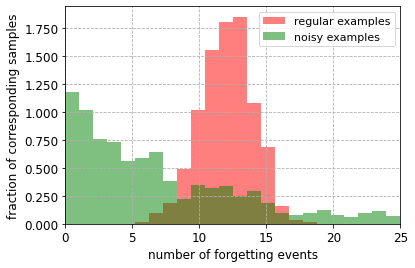

In [11]:
# 创建图
fig, axes = plt.subplots()

# 伪造数据
r_data = np.random.normal(12, 2, 900)
g_data = np.random.exponential(8, 900)

# 生成伪造的图像
axes.hist(r_data, bins=np.linspace(0, 25, 25), color='r', alpha=0.5, label='regular examples')
axes.hist(g_data, bins=np.linspace(0, 25, 25), color='g', alpha=0.5, label='noisy examples')

# 设置x轴范围
axes.set_xlim(0, 25)

# 设置x轴和y轴标签
axes.set_xlabel('number of forgetting events', size=12)
axes.set_ylabel('fraction of corresponding samples', size=12, )

# 设置x轴标度和字号
axes.set_xticklabels(list(range(0, 26, 5)), fontsize=12)

# 设置y轴标度和字号
axes.set_yticklabels(['{:.3f}'.format(i / 100.0) for i in range(0, 225, 25)], fontsize=12)

# 开启图例
axes.legend(fontsize=11)

# 开启虚线网格
axes.grid(True, linestyle='--')     